NAME:G.KRUTHIK ROSHAN

BATCH >> 41

HALL TICKET :2303A52339

AIML LAB EXTERNAL (2024 – 25)

     SET – 3 (KNN Classification)

1. Apply KNN on a classification dataset with k=3 and evaluate its accuracy.

2. Visualize the decision boundary for KNN with k=3.

3. Split the dataset into training and testing sets and compute the confusion
matrix.

4. Compare the performance of KNN with and without feature scaling.

5. Tune the value of k (e.g., test with k=5) and compare performance.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from matplotlib.colors import ListedColormap

In [2]:
# Define column names for the Iris dataset
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
url = "loan_data.csv"

# Load the dataset
data = pd.read_csv(url, header=None, names=column_names)
print(data.head())

                                                                                                                                         sepal_length  \
person_age person_gender person_education person_income person_emp_exp person_home_ownership loan_amnt loan_intent loan_int_rate  loan_percent_income   
22.0       female        Master           71948.0       0              RENT                  35000.0   PERSONAL    16.02                         0.49   
21.0       female        High School      12282.0       0              OWN                   1000.0    EDUCATION   11.14                         0.08   
25.0       female        High School      12438.0       3              MORTGAGE              5500.0    MEDICAL     12.87                         0.44   
23.0       female        Bachelor         79753.0       0              RENT                  35000.0   MEDICAL     15.23                         0.44   

                                                                                 

In [5]:
# Separate features and target
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Check the class distribution of the target variable
unique_classes, class_counts = np.unique(y, return_counts=True)
print("Class Distribution:")
for class_name, count in zip(unique_classes, class_counts):
    print(f"{class_name}: {count}")

# Remove classes with less than 2 samples
min_samples_per_class = 2  # Define the minimum number of samples per class
valid_classes = unique_classes[class_counts >= min_samples_per_class]
data = data[data['class'].isin(valid_classes)]

# Update features and target after removing classes
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

Class Distribution:
0: 35000
1: 10000
loan_status: 1


In [8]:
# Check for string labels and encode if necessary
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded)

# Fit KNN model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Evaluate
from sklearn.metrics import accuracy_score, confusion_matrix

acc_no_scaling = accuracy_score(y_test, y_pred)
print(f"Accuracy without feature scaling: {acc_no_scaling}")

cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{cm}")

Accuracy without feature scaling: 0.7981481481481482
Confusion Matrix:
[[9499 1001]
 [1724 1276]]


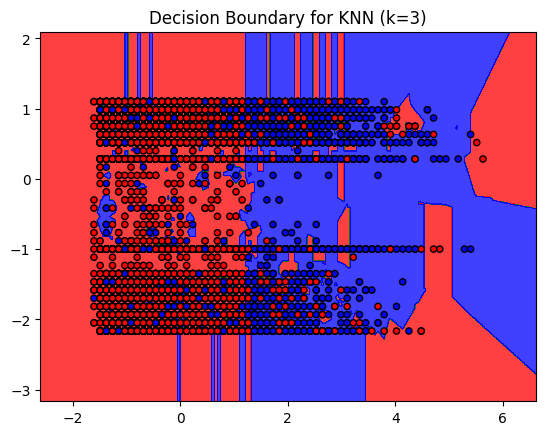

In [10]:
def plot_decision_boundary(X, y, model, title):
    X_set, y_set = X, y
    X1, X2 = np.meshgrid(
        np.arange(X_set[:, 0].min() - 1, X_set[:, 0].max() + 1, 0.01),
        np.arange(X_set[:, 1].min() - 1, X_set[:, 1].max() + 1, 0.01),
    )
    plt.contourf(
        X1,
        X2,
        model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
        alpha=0.75,
        cmap=ListedColormap(("red", "green", "blue")),
    )
    plt.scatter(
        X_set[:, 0],
        X_set[:, 1],
        c=y_set,
        cmap=ListedColormap(("red", "green", "blue")),
        edgecolor="k",
        s=20,
    )
    plt.title(title)
    plt.show()

# Use first two features for visualization
knn_decision_boundary = KNeighborsClassifier(n_neighbors=3)
knn_decision_boundary.fit(X_train_scaled[:, :2], y_train)
plot_decision_boundary(X_train_scaled[:, :2], y_train, knn_decision_boundary, "Decision Boundary for KNN (k=3)")


In [11]:
# Test with k=5
knn_k5 = KNeighborsClassifier(n_neighbors=5)
knn_k5.fit(X_train_scaled, y_train)
y_pred_k5 = knn_k5.predict(X_test_scaled)

acc_k5 = accuracy_score(y_test, y_pred_k5)
print(f"Accuracy with k=5: {acc_k5}")

Accuracy with k=5: 0.8381481481481482


In [12]:
print("Performance Summary:")
print(f"Accuracy without scaling (k=3): {acc_no_scaling}")
print(f"Accuracy with scaling (k=3): {acc_with_scaling}")
print(f"Accuracy with scaling (k=5): {acc_k5}")

Performance Summary:
Accuracy without scaling (k=3): 0.7981481481481482
Accuracy with scaling (k=3): 0.8331851851851851
Accuracy with scaling (k=5): 0.8381481481481482
